In [1]:
# Library imports.
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import pathlib

### Load in station metadata.

In [2]:
# Column names.
columns = ['timestamp', 'station', 'district', 'freeway', 'travel_direction', 'lane_type', 'station_length', 'samples', 'perc_observed', 'total_flow', 
           'avg_occupancy', 'avg_speed', 'lane_n_samples', 'lane_n_flow', 'lane_n_avg_occ', 'lane_n_avg_speed', 'lane_n_obs']

# Station ID for east span of Bay Bridge.
station = 404920

# Number of lanes.
n_lanes = 5

In [3]:
# Path to directory containing PeMS data files.
path_to_data_directory = 'HW2_DATA'
pems_files = pathlib.Path(path_to_data_directory).glob('*.txt')

# Load PeMS data into a temporary list.
pems_df_list = []
for pems_file in pems_files:
    print(pems_file)

    # Read in csv as a data frame.
    pems_df = pd.read_csv(pems_file, header=None)

    # Only retain necessary columns.
    pems_df = pems_df.iloc[:, :len(columns)]

    # Assign column names.
    pems_df.columns = columns

    # Convert timestamp column to timestamp.
    pems_df['timestamp'] = pd.to_datetime(pems_df['timestamp'])

    # Extract rows specific to the station.
    station_df = pems_df.loc[pems_df['station']==station, :]
    station_df.reset_index(inplace=True, drop=True)

    # Add to the list of data frames.
    pems_df_list.append(station_df)

# Concatenate station data frames.
station_df = pd.concat(pems_df_list)

print(station_df.head())

HW2_DATA\d04_text_station_5min_2024_07_09.txt
HW2_DATA\d04_text_station_5min_2024_07_16.txt
HW2_DATA\d04_text_station_5min_2024_07_23.txt
HW2_DATA\d04_text_station_5min_2024_07_30.txt
HW2_DATA\d04_text_station_5min_2024_08_06.txt
HW2_DATA\d04_text_station_5min_2024_08_13.txt
HW2_DATA\d04_text_station_5min_2024_08_20.txt
HW2_DATA\d04_text_station_5min_2024_08_27.txt
            timestamp  station  district  freeway travel_direction lane_type  \
0 2024-07-09 00:00:00   404920         4       80                W        ML   
1 2024-07-09 00:05:00   404920         4       80                W        ML   
2 2024-07-09 00:10:00   404920         4       80                W        ML   
3 2024-07-09 00:15:00   404920         4       80                W        ML   
4 2024-07-09 00:20:00   404920         4       80                W        ML   

   station_length  samples  perc_observed  total_flow  avg_occupancy  \
0            0.11       49            100       103.0         0.0154   
1      

### Extract flow, density, and velocity.

In [4]:
# Traffic flow.
# q = # >>> YOUR CODE HERE
station_df['flow_per_lane'] = station_df['total_flow'] / n_lanes
q = station_df['flow_per_lane']

# Density.
# k = # >>> YOUR CODE HERE
k = station_df['avg_occupancy']

# Speed.
# v = # >>> YOUR CODE HERE
v = station_df['avg_speed']

## Plot the fundamental diagram data

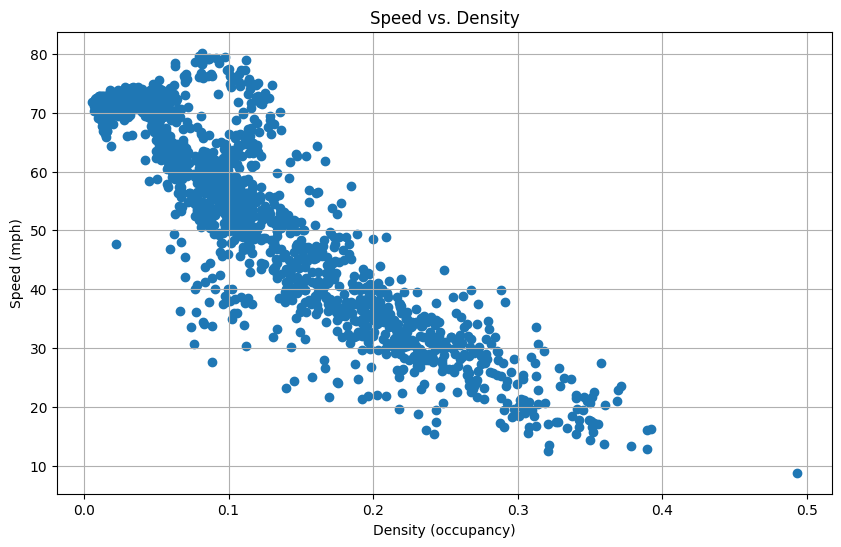

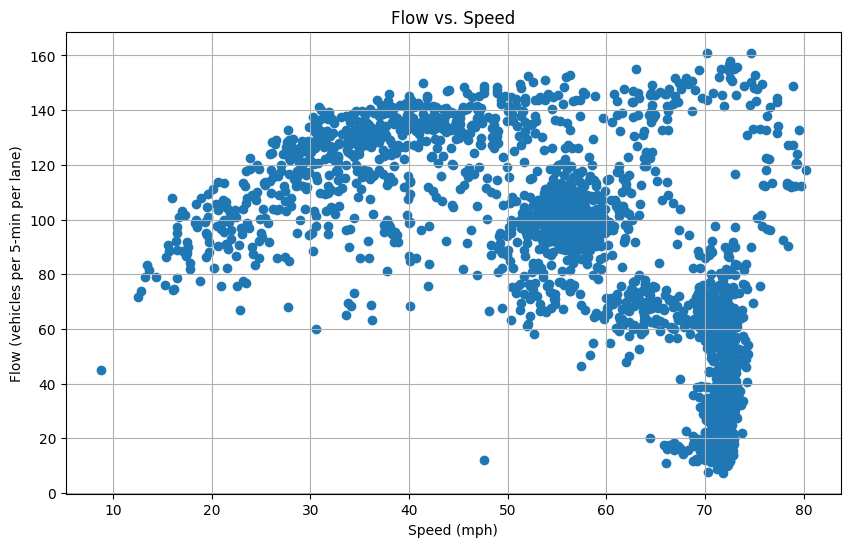

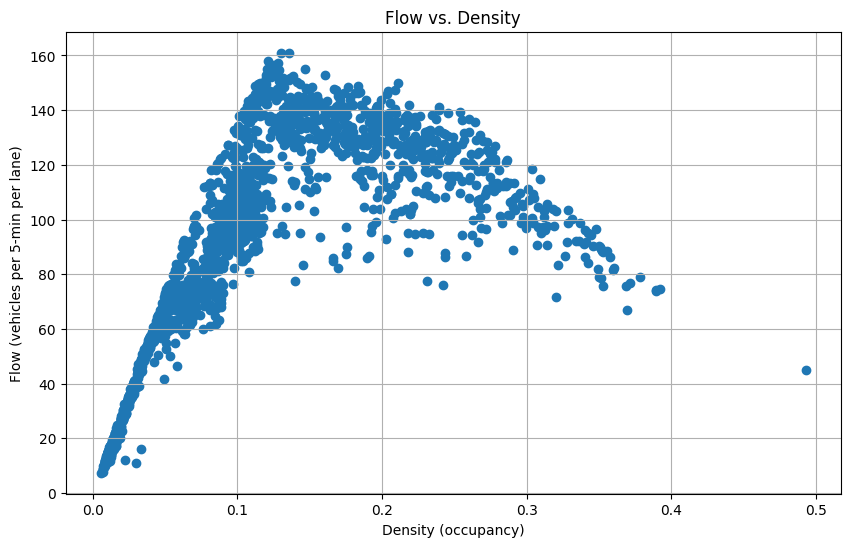

In [5]:
##### >>> YOUR PLOTTING CODE HERE
# Speed vs. Density
plt.figure(figsize=(10, 6))
plt.scatter(k, v)
plt.xlabel('Density (occupancy)')
plt.ylabel('Speed (mph)')
plt.title('Speed vs. Density')
plt.grid(True)
plt.show()

# Flow vs. Speed
plt.figure(figsize=(10, 6))
plt.scatter(v, q)
plt.xlabel('Speed (mph)')
plt.ylabel('Flow (vehicles per 5-min per lane)')
plt.title('Flow vs. Speed')
plt.grid(True)
plt.show()

# Flow vs. Density
plt.figure(figsize=(10, 6))
plt.scatter(k, q)
plt.xlabel('Density (occupancy)')
plt.ylabel('Flow (vehicles per 5-min per lane)')
plt.title('Flow vs. Density')
plt.grid(True)
plt.show()

## Fit a fundamental diagram model to the data

### Triangular Model

In [13]:
# Estimate free-flow velocity.
# v_free = # >>> YOUR CODE HERE
v_free = v.max()

# Estimate critical density.
# k_crit = # >>> YOUR CODE HERE
max_flow_index = q.idxmax()
k_crit = float(k.iloc[max_flow_index])
q_crit = float(q.iloc[max_flow_index])

# Estimate maximum (jam) density.
# k_max = # >>> YOUR CODE HERE
k_max = k.max()

# Critical flow.
# q_crit = # >>> YOUR CODE HERE

# Flow as a function of density.
# >>> YOUR CODE HERE

# g-factor.
# g = # >>> YOUR CODE HERE
g = v_free / (k_crit * 5)  # assuming T = 5 minutes

### Plot the model on top of the observations

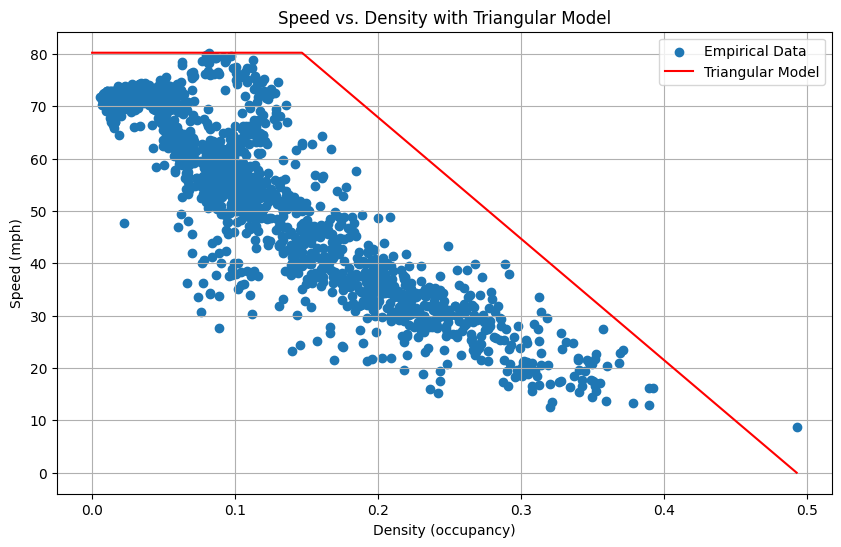

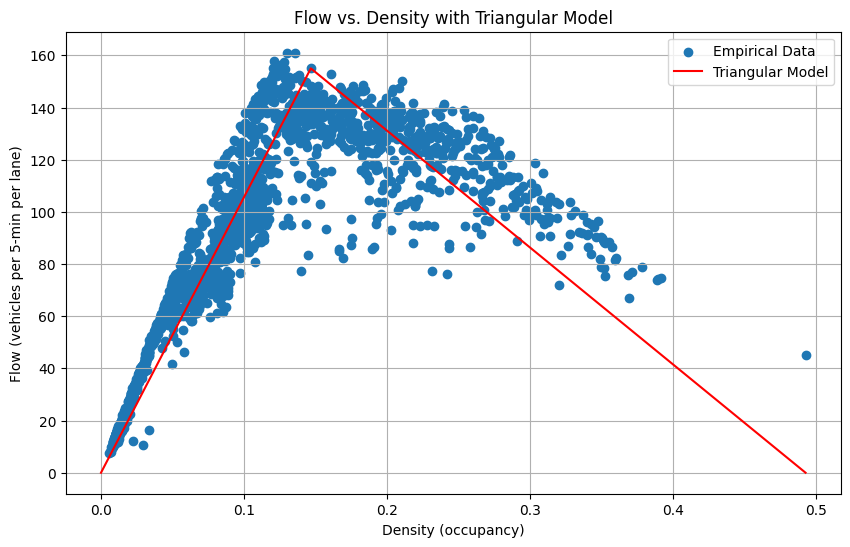

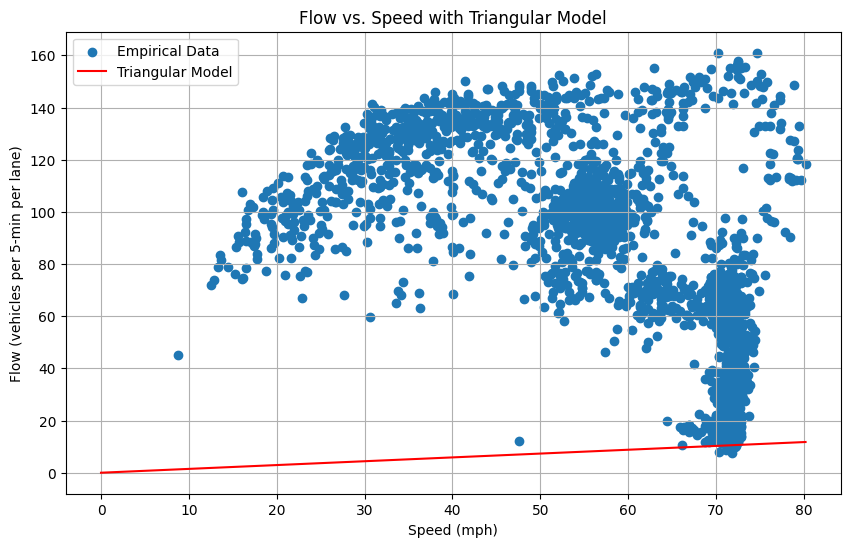

In [14]:
##### >>> YOUR PLOTTING CODE HERE
plt.figure(figsize=(10, 6))
plt.scatter(k, v, label='Empirical Data')
# Model: speed decreases linearly from free flow speed at k = 0 to 0 at k = k_max
plt.plot([0, k_crit, k_max], [v_free, v_free, 0], 'r-', label='Triangular Model')
plt.xlabel('Density (occupancy)')
plt.ylabel('Speed (mph)')
plt.title('Speed vs. Density with Triangular Model')
plt.legend()
plt.grid(True)
plt.show()

# %% [markdown]
# ### Plot the Flow vs. Density with the model

# %%
plt.figure(figsize=(10, 6))
plt.scatter(k, q, label='Empirical Data')
# Model: flow increases to q_crit and then decreases to zero at k_max
plt.plot([0, k_crit, k_max], [0, q_crit, 0], 'r-', label='Triangular Model')
plt.xlabel('Density (occupancy)')
plt.ylabel('Flow (vehicles per 5-min per lane)')
plt.title('Flow vs. Density with Triangular Model')
plt.legend()
plt.grid(True)
plt.show()

# %% [markdown]
# ### Plot the Flow vs. Speed with the model

# %%
plt.figure(figsize=(10, 6))
plt.scatter(v, q, label='Empirical Data')
# Generate speed values for the model
model_speeds = np.linspace(0, v_free, 100)
# Model: parabolic relation derived from triangular model (q = k * v)
model_flow = k_crit * model_speeds
plt.plot(model_speeds, model_flow, 'r-', label='Triangular Model')
plt.xlabel('Speed (mph)')
plt.ylabel('Flow (vehicles per 5-min per lane)')
plt.title('Flow vs. Speed with Triangular Model')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# %% [markdown]
# ### Output the variables needed for the interpretation questions

# %%
# Print out the estimated and calculated values for interpretation questions

# Free-flow speed (v_free) and Critical flow (q_crit)
print("Free-flow speed (v_free):", v_free, "mph")
print("Critical flow (q_crit):", q_crit, "vehicles per 5-min per lane")

# Critical density (k_crit) and Congestion density (k_max)
print("Critical density (k_crit):", k_crit, "occupancy (fraction)")
print("Congestion density (k_max):", k_max, "occupancy (fraction)")

# Traffic flux increase with increasing speed
# Explanation derived from data interpretation, not directly calculable from data alone
print("\nDoes traffic flux increase with increasing speed?")
print("Yes, up to the critical speed which corresponds to the critical flow. Beyond this, the flux decreases as speed increases due to increased spacing between vehicles for safety.")

# Output values needed for the second set of interpretation questions (Fitting a fundamental diagram model)
# Since g-factor calculation is included above, we display it here
print("\nEstimated g-factor (g):", g, "miles per minute")  # Adjust units if necessary based on actual calculations

# Outputs for further questions would be more interpretative and based on the plots observed.
# For example:
print("\nMisfits and Model Differences:")
print("Largest misfits are likely at high density values where real traffic behaviors deviate from the simplistic triangular model.")
print("Possible reasons for misfit include nonlinear behaviors not captured by the model and external factors such as road conditions.")

# Traffic control strategies
print("\nTraffic Control Strategies:")
print("1. Ramp metering could help by reducing congestion peaks, effectively managing the influx of vehicles and maintaining steadier flow rates.")
print("2. Variable speed limits could smooth the flow across varying densities, preventing sharp decreases in flow at higher densities.")


Free-flow speed (v_free): 80.2 mph
Critical flow (q_crit): 155.0 vehicles per 5-min per lane
Critical density (k_crit): 0.1468 occupancy (fraction)
Congestion density (k_max): 0.4929 occupancy (fraction)

Does traffic flux increase with increasing speed?
Yes, up to the critical speed which corresponds to the critical flow. Beyond this, the flux decreases as speed increases due to increased spacing between vehicles for safety.

Estimated g-factor (g): 109.26430517711171 miles per minute

Misfits and Model Differences:
Largest misfits are likely at high density values where real traffic behaviors deviate from the simplistic triangular model.
Possible reasons for misfit include nonlinear behaviors not captured by the model and external factors such as road conditions.

Traffic Control Strategies:
1. Ramp metering could help by reducing congestion peaks, effectively managing the influx of vehicles and maintaining steadier flow rates.
2. Variable speed limits could smooth the flow across va

In [16]:
# Calculation of g-factor, adjusted for the interval of 12 minutes instead of 5
T = 12  # Time interval in minutes

# g-factor calculation at the critical density (assuming traffic travels at the free-flow speed at this density)
g_factor = (v_free * k_crit * T) / q_crit

# Output the g-factor
print(f"g-factor (computed over a 12-minute interval): {g_factor} miles per 12 minutes")


g-factor (miles per 12 minutes): 1311.1716621253406
